<a href="https://colab.research.google.com/github/Eman-diab-hussein/deep/blob/main/ML_Lab_Time_Series_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we peform detailed Time Series Analysis and Exploratory Data Analsysis on Apple Stock Price Prediction.



In [ ]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# read the dataset
dataset=pd.read_csv("AAPL.csv")
dataset.head()

Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600

In [ ]:
dataset.tail(5)


Date        Open        High         Low       Close   Adj Close  \
10463  2022-06-13  132.869995  135.199997  131.440002  131.880005  131.880005   
10464  2022-06-14  133.130005  133.889999  131.479996  132.759995  132.759995   
10465  2022-06-15  134.289993  137.339996  132.160004  135.429993  135.429993   
10466  2022-06-16  132.080002  132.389999  129.039993  130.059998  130.059998   
10467  2022-06-17  130.070007  133.080002  129.809998  131.559998  131.559998   

          Volume  
10463  122207100  
10464   84784300  
10465   91533000  
10466  108123900  
10467  134118500

In [ ]:
print(dataset.shape)


(10468, 7)


In [ ]:
# dataset info
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB
None


In [ ]:
# Check Is there any null values in the Dataset
print(dataset.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
# Check the Duplicate value in the Dataset
print(dataset.duplicated().sum())

0


In [ ]:
# Extracting year from the data
dataset["Date"]=pd.to_datetime(dataset["Date"])

In [ ]:
dataset.head()

Date      Open      High       Low     Close  Adj Close     Volume
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600



---



Visualize the Correlation Matrix



<ipython-input-14-86a5640f20d1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), fmt=".2f", annot=True, cmap='Greens')


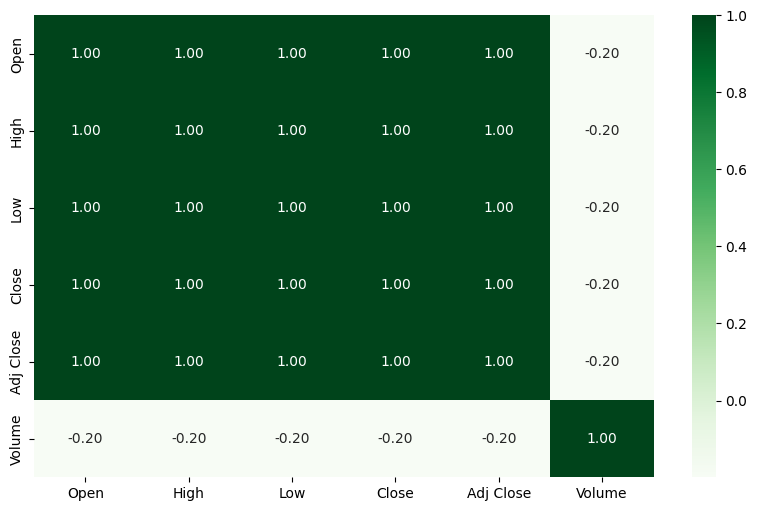

In [ ]:
# Lets Visualise the Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(), fmt=".2f", annot=True, cmap='Greens')
plt.show()



---




**Exploratory Data Analysis**



Analysis of High and Low Stocks of Apple From Year 1985-2022

In [ ]:
fig = px.line(dataset, x="Date", y=["High","Low"],title="Stocks High and Low Values Over Time")
fig.show()

Analysis of High and Low Stocks From Year 2012-2022

In [ ]:
fig = px.line(dataset, x="Date", y=["High","Low"], range_x=['2012-01-01','2022-06-17'])
fig.show()

As we observe from the above two Graphs the trend of High and Low stocks of Apples are almost same, and we also notice the positive correlation between them. And if we talk about the last 10 years period from the current year, we can see the upward trend, the High Stock value start with 14.94 in year 2012 and then gradually increase till year 2019 and after this year the High Stocks value significantly increase reaches its maximum peak with the value of 182.94 in year 2022.



---

Analysis of High and Low Stocks From Year 2017-2022

In [ ]:
fig = px.line(dataset, x="Date", y=["High","Low"], range_x=['2017-01-01','2022-06-17'])
fig.show()



Analysis of Open and Close Stocks From Year 1980-2022



In [ ]:
fig = px.area(dataset, x="Date", y=["Open","Close"],title="Open and Close Stocks Over Time")
fig.show()

In the Below Chart we can see the comparison of Open, High, Low,


Close stocks by Selecting different Date Range Window

In [ ]:
# Create a line chart using the dataset with two lines, 'High' and 'Low' on the y-axis

list1=["Open","High","Low","Close"]
list2=["High", "Low"]
list3=["Open","Close"]
list4=[list1, list2, list3]


for i in range(len(list4)):
    fig = px.line(dataset, x="Date", y=list4[i], title="Stocks Distribution over Different Time Window")

    # Update the x-axis settings to include a range slider
    # This allows users to zoom in on specific date ranges
    fig.update_xaxes(
    rangeslider_visible=True,

    # Configure a rangeselector with buttons for different time intervals
    rangeselector=dict(
    buttons=list([
    dict(count=1, label="1m", step="month", stepmode="todate"),
    dict(count=6, label="6m", step="month", stepmode="backward"),
    dict(count=1, label="YTD", step="year", stepmode="todate"),
    dict(count=1, label="Y", step="year", stepmode="backward"),
    dict(count=5, label="5y", step="year", stepmode="backward"),
    dict(count=10, label="10y", step="year", stepmode="backward"),
    dict(step="all")
    ])
    )
    )

  # Display the figure
    fig.show()